Oddelek za gospodarske dejavnosti in (motorni) promet Mestne občine Ljubljana (MOL) slovi po srce parajoči skrbi za varnost kolesarjev. V imenu te skrbi jim povsod, kjer je to v interesu kolesarjev, odvzame prednost, jim postavlja različne ovire, viša robnike in ukinja kolesarske steze, kjer niso potrebne (predvsem, če je tam slučajno potrebno povečati število parkirišč za avtomobile). Vašemu profesorju se vsak dan orosi oko od ganjene hvaležnosti MOLu ob pogledu na mesto na Večni poti, kjer so - kot je povedal MOL - kolesarjem odvzeli prednost, da jih ne bi povozil avto ali kombi, ki morda ne bi vedel, da imajo tu prednost kolesarji. ([Več o tem si preberite na strani Runda](https://runda.si/article/sikaniranje-dobesedno-).)

## Ogrevalna naloga

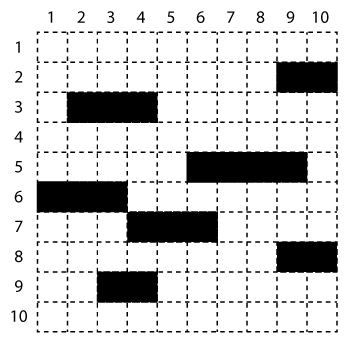

Recimo, da so ovire postavljene, kot kaže slika. V Pythonu bi lahko njihove pozicije opisali s seznamom trojk (terk) `(x1, x2, y)`, kjer sta `x1` in `x2` (`x1 <= x2`) številki stolpca, kjer se ovira začne in konča (ovira vključuje tudi `x2`). Ovire na sliki bi tako opisali s seznamom

```python
ovire = [(1, 3, 6), (2, 4, 3), (4, 6, 7),
         (3, 4, 9), (6, 9, 5), (9, 10, 2), (9, 10, 8)]
```

Vrstni red elementov seznama je nepomemben.

Napiši naslednje funkcije

- `stevilo_ovir(ovire)` prejme ovire v obliki seznama trojk (x0, x1, y) in vrne število ovir.
- `dolzina_ovir(ovire)` vrne skupno dolžino vseh ovir.
- `sirina(ovire)` vrne širino kolesarke steze, se pravi najbolj desno koordinato v seznamu ovir.

Napiši program, ki se začne s seznamom ovir in številko stolpca, na primer

### Rešitev

Tale naloga preverja samo, ali znamo definirati funkcije. No, pa napisati kakšno preprosto zanko.

In [1]:
def stevilo_ovir(ovire):
    return len(ovire)

def dolzina_ovir(ovire):
    dolzina = 0
    for x0, x1, _ in ovire:
        dolzina += x1 - x0 + 1
    return dolzina

def sirina(ovire):
    najx = 0
    for _, x1, _ in ovire:
        if x1 > najx:
            najx = x1
    return najx

## Obvezna naloga

Napiši funkcije

- `globina(ovire, x)` prejme seznam ovir (v obliki trojk) in vrne vrstico, v kateri bi kolesar, ki se vozi po stolpcu `x` od zgoraj navzdol, naletel na oviro. Če v stolpcu ni ovir, naj vrne `None`.
- `naj_stolpec(ovire)` vrne stolpec, v katerem kolesar pride najdlje in vrstico, do katere pride. Možno je tudi, da v kakem stolpcu ni ovire; v tem primeru vrne koordinato tega stolpca in `None`.
- `senca(ovire)` vrne seznam, katerega elementa so `False` oz. `True` glede na to, ali stolpec vsebuje kako oviro ali ne. Če je širina poti `5` in sta drugi in zadnji stolpec brez ovir (to ni primer s slike), vrne `[False, True, False, False, True]`.

### Rešitev

Tudi ta naloga ni kaj prida težja.

In [2]:
def globina(ovire, x):
    najy = None
    for x0, x1, y in ovire:
        if x0 <= x <= x1 and (najy == None or y < najy):
            najy = y
    return najy

Tule velja spomniti na dvoje.

Prvo je nizanje primerjav. Medtem ko bi morali v drugih jezikih, ki jih nekateri od vas poznate, pisati `if x >= x0 and x <= x1`, lahko v Pythonu pišemo kar `if x0 <= x <= x1`.

Drugi: kratkostično obnašanje. Začetni `najy` smo postavili na `None`. Lahko bi ga pravzaprav tudi na `0` in funkcija bi še vedno delovala, a takole je bolj zanimivo (in v splošnem se lahko zgodi, da ne bomo imeli primerne začetne vrednosti, kot je `0`, zato je čisto koristno, če se naučimo tole narediti z `None`). Primerjanje bi v bistvu napisali takole:

```
if x0 <= x <= x1 and y < najy
```

vendar to ne bi delovalo, kadar `najy` še nima "določene" začetne vrednosti in je še enak `None`. V tem primeru bi `y < najy` javil napako, saj ne more primerjati števila z `None`. Zato pišemo `najy == None or y < najy`. Pomembno je, da je `najy == None` pred `y < najy`. Ker imamo disjunkcijo, `or`, se Python v primeru, da je resničen že prvi pogoj, z drugim pogojem sploh ne bo ukvarjal.

V funkciji `naj_stolpec` je zanimivo

In [ ]:
def naj_stolpec(ovire):
    naj_y = 0
    for x in range(1, sirina(ovire) + 1):
        g = globina(ovire, x)
        if g == None:
            return x, None
        if g > naj_y:
            naj_y = g
            naj_x = x
    return naj_x, naj_y

Najprej: v tej funkciji kličemo funkcijo `globina`. Kdor tega ni storil in je namesto tega znotraj te funkcije ponovno računal globino in tako praktično ponovil vso kodo prejšnje funkcije, naj se ne pritožuje, da dajem pretežke domače naloge. Kriv si je namreč sam.

Naslednje: `return` znotraj funkcije. Čim naletimo na stolpec, po katerem je mogoče priti do konca, vrnemo številko tega stolpca. To tudi prekine zanko.

Zadnje: nekoč bomo namesto `g == None` pisali `g is None`. Povem samo toliko, da se kdo, ki bo tole bral čez kak mesec ali kasneje, ne bi spotikal, zakaj zdaj tako in kasneje drugače. Zato, ker še ne vemo za `is` in še ne razumemo, kaj dela in v čem je `None` poseben.

In [3]:
def senca(ovire):
    zaprti = []
    for x in range(1, sirina(ovire) + 1):
        zaprti.append(globina(ovire, x) == None)
    return zaprti

Tudi ta funkcija uporablja funkcijo `globina`, saj bi sicer ponovila večino kode te funkcije. Globina sicer vrača več, kot potrebujemo - pove nam globino, nas pa zanima le, ali vrne `None` ali ne. Nič hudega.

Bodite pozorni:

```python
zaprti.append(globina(ovire, x) == None)
```

in ne

```python
if globina(ovire, x) == None:
    zaprti.append(True)
else:
    zaprti.append(False)
```

Seveda deluje tudi drugo, vendar ni smiselno, saj je `globina(ovire, x) == None` že vrednost, ki jo želimo dodati v seznam. (Zanimivo: študenti rezultat primerjanja stalno dojemajo kot *pogoj*, ki ga lahko uporabljajo v `if` in `while`, ne pa kot vrednost, ki jo lahko uporabijo, kjerkoli. Mogoče bi se to rešilo tako, da bi že eno predavanje, preden začnemo s pogoji, predstavil logične izraze, kot nekaj, kar pač vrne `True` ali `False`?!)

## Dodatna naloga

MOL je poslal zemljevid ovir na kolesarski poti. Zemljevid je shranjen kot seznam nizov, ki predstavljajo "vrstice": `#` predstavlja oviro, `.` pa prosto pot.

Zemljevid je lahko, recimo, takšen

```
["..........",
 "........##",
 ".###......",
 "..........",
 ".....####.",
 "###.......",
 "...###....",
 "........##",
 "..##......",
 ".........."]
```

Napiši funkciji
    
- `pretvori_vrstico(vrstica)` prejme vrstico v obliki niza, sestavljenega iz znakov # in . ter vrne seznam parov (x0, x1), ki predstavljajo začetne in končne stolpce ovir v tej vrstici.

    Klic `pretvori_vrstico(".##..####...##")` vrne `[(2, 3), (6, 9), (13, 14)]`. **Ne spreglej**, da koordinate niso opisane po "Pythonovsko": prvi stolpec ima indeks 1 in obe meji sta vključeni (`(6, 9)` pokriva tudi vrstico 9, torej vsebuje 4 `#`).

- `pretvori_zemljevid(zemljevid)` dobi zemljevid v obliki seznama nizov in vrne seznam ovir, s kakršnim smo delali v ogrevalni in obvezni nalogi.


### `pretvori_vrstico`

Tu stvari končno postanejo zanimive. Seveda predvsem pri prvi funkciji, druga je potem trivialna.

Da bomo razmišljali o vseh sitnostih hkrati, vzemimo tale niz:

```
##...#.###..##
12345678901234
```

Vsebuje oviro na začetku in na koncu, oviro dolžine 1 in oviri, ki sta razmaknjeni za 1. Spodaj smo napisali številke, da lažje razberemo pričakovani rezultat: `[(1, 2), (6, 6), (7, 9), (13, 14)]`.

Nalogo je možno rešiti na kup načinov. Vsem je skupno to, da se je potrebno dobro zorganizirati.

En zanimiv trik je, da na začetek in konec niza prištejemo piko. Tako bo pred vsakim `#`, ki začenja oviro, pika, četudi je (bil) ta `#` na začetku vrstice. Prav tako bo `.` za vsakim `#`, ki končuje oviro, četudi je (bil) na koncu vrstice.

In [5]:
def pretvori_vrstico(ovire):
    ovire = "." + ovire + "."
    bloki = []
    for i in range(len(ovire)):
        if ovire[i] == "#":
            if ovire[i - 1] == ".":
                zacetek = i
            if ovire[i + 1] == ".":
                bloki.append((zacetek, i))
    print(bloki)

Če vidimo `#`, pred katerim je `.`, si zapomnimo, da je to začetek. Če vidimo `#`, za katerim je `.`, v seznam blokov dodamo blok od začetka do trenutnega indeksa.

Za posamične `#` se zgodi oboje naenkrat, zato tu nismo uporabili kakega `else` ali `elif`.

Stolpce v tej nalogi štejemo od `1` ne od `0`. Naši indeksi bodo pravilni, saj smo na začetek dodali `.`.

Zdaj pa izboljšave.

Na predavanjih običajno stokam, da `range(len(ovire))` ni lepo pisati - sploh, kadar potrebuješ tako indeks kot element. Raje pišimo:

In [3]:
ovire = "##...#.###..##"


ovire = "." + ovire + "."
bloki = []
for i, znak in enumerate(ovire):
    if znak == "#":
        if ovire[i - 1] == ".":
            zacetek = i
        if ovire[i + 1] == ".":
            bloki.append((zacetek, i))
print(bloki)

[(1, 2), (6, 6), (8, 10), (13, 14)]


Se lahko zgodi, da bi bil indeks `i + 1` prevelik? To bi bilo možno le, če bi bil zadnji znak `#` in bi se torej spraševali po znaku za njim. To pa ne more biti, saj smo na konec dodali piko. Prav tako `i - 1` nikoli ne bo `-1`, saj je ničti znak vedno `.` in ne `#`.

Še lepše je, če uporabimo čistokrvni `zip`. V tem primeru lahko pike dodamo kar v klicu `zip`-a.

In [4]:
ovire = "##...#.###..##"


bloki = []
for i, (prej, znak, potem) in enumerate(zip("." + ovire, ovire, ovire[1:] + "."), start=1):
    if znak == "#":
        if prej == ".":
            zacetek = i
        if potem == ".":
            bloki.append((zacetek, i))
print(bloki)

[(1, 2), (6, 6), (8, 10), (13, 14)]


Najprej, kaj zipamo. Tole

Okrog `zip`-a pride še `enumerate`, da bomo imeli indekse; vse skupaj je potrebno razpakirati kot `for i, (prej, znak, potem)`, saj imamo pare (indeks, element), pri čemer je element trojka.

Končno, ker morajo indeksi teči od `1`, smo v `enumerate` dodali `start=1`.

Zdaj pa malo drugačna različica: zabeležimo vse spremembe.

In [5]:
ovire = "##...#.###..##"


ovire = "." + ovire + "."
spremembe = []
for i in range(len(ovire)):
    if ovire[i] != ovire[i - 1]:
        spremembe.append(i)
        
spremembe

[1, 3, 6, 7, 8, 11, 13, 15]

Te indekse je potrebno popariti:

In [6]:
list(zip(spremembe[::2], spremembe[1::2]))

[(1, 3), (6, 7), (8, 11), (13, 15)]

Žal so drugi elementi teh terk - konci blokov - preveliki. Ker terk ni mogoče spreminjati, nam (dokler se ne naučimo, kako to storiti drugače) ne preostane drugega kot prepisati jih v nov seznam. No, saj ni tako hudo.

In [7]:
ovire = "##...#.###..##"


ovire = "." + ovire + "."
spremembe = []
for i in range(len(ovire)):
    if ovire[i] != ovire[i - 1]:
        spremembe.append(i)
        
bloki = []
for zac, kon in zip(spremembe[::2], spremembe[1::2]):
    bloki.append((zac, kon - 1))
    
bloki

[(1, 2), (6, 6), (8, 10), (13, 14)]

Pa brez dodajanja pik na začetek in konec? Gre, samo malo več sitnosti je. Recimo tako:

In [8]:
ovire = "##...#.###..##"

prej = "."
bloki = []
for i, znak in enumerate(ovire, start=1):
    if znak != prej:
        if znak == "#":
            zacetek = i
        else:
            bloki.append((zacetek, i))
    prej = znak
    
if ovire[-1] == "#":
    bloki.append((zacetek, len(ovire)))
    
bloki        

[(1, 3), (6, 7), (8, 11), (13, 14)]

V spremenljivko `prej` beležimo, kakšen je bil prejšnji znak. V začetku se pretvarjamo, da je `"."`. To poskrbi, da zaznamo oviro na začetku niza. Za oviro na koncu pa poskrbimo z `if` po zanki.

Če ne vemo, da ima `enumerate` lahko tudi argument `start`, namesto `i` vedno pišemo `i + 1`.

### `pretvori_zemljevid`

Tole pa je spet rutinsko.

In [7]:
def pretvori_zemljevid(zemljevid):
    ovire = []
    for y, vrstica in enumerate(zemljevid, start=1):
        for x0, x1 in pretvori_vrstico(vrstica):
            ovire.append((x0, x1, y))
    return ovire

Prva opazka: `enumerate` ima dodatni argument `start`, s katerim mu lahko povemo, kje naj začne šteti.

Druga: enkrat kmalu se bomo naučili to napisati krajše.

In [8]:
def pretvori_zemljevid(zemljevid):
    ovire = []
    for y, vrstica in enumerate(zemljevid, start=1):
        ovire += [(x0, x1, y) for x0, x1 in pretvori_vrstico(vrstica)]
    return ovire